<a href="https://colab.research.google.com/github/Tirta2241720045/Machine_Learning/blob/main/Minggu13/faceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import cv2

In [41]:
imagePath = "/content/drive/MyDrive/dataset/Minggu12ML/images/Aaron_Guiel_0001.jpg"

In [42]:
img = cv2.imread(imagePath)

In [43]:
img.shape

(150, 150, 3)

In [44]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [45]:
gray_image.shape

(150, 150)

In [46]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [47]:
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

In [55]:
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

In [56]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

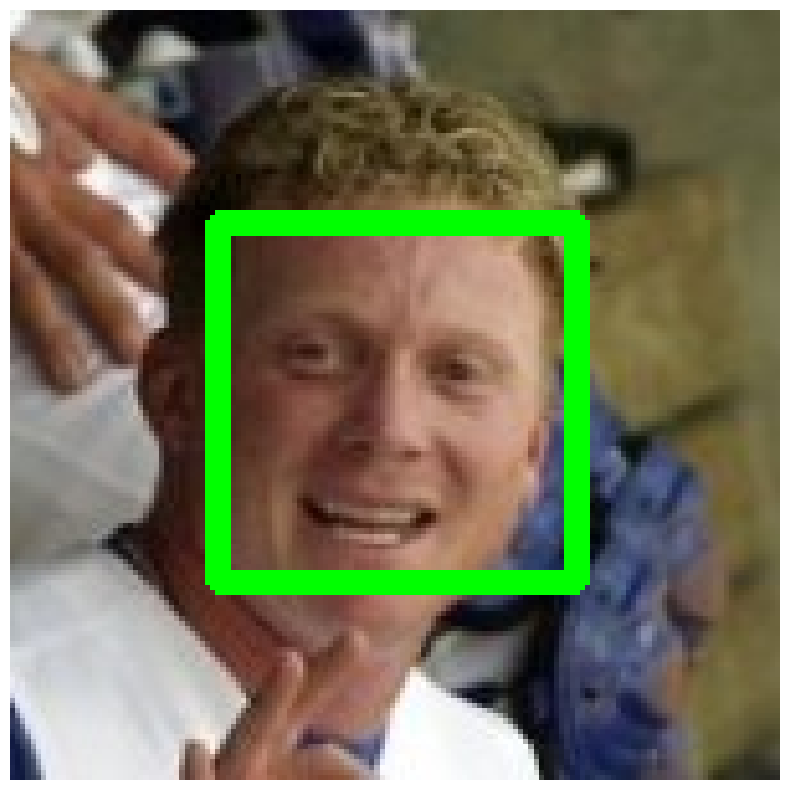

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

# Tugas

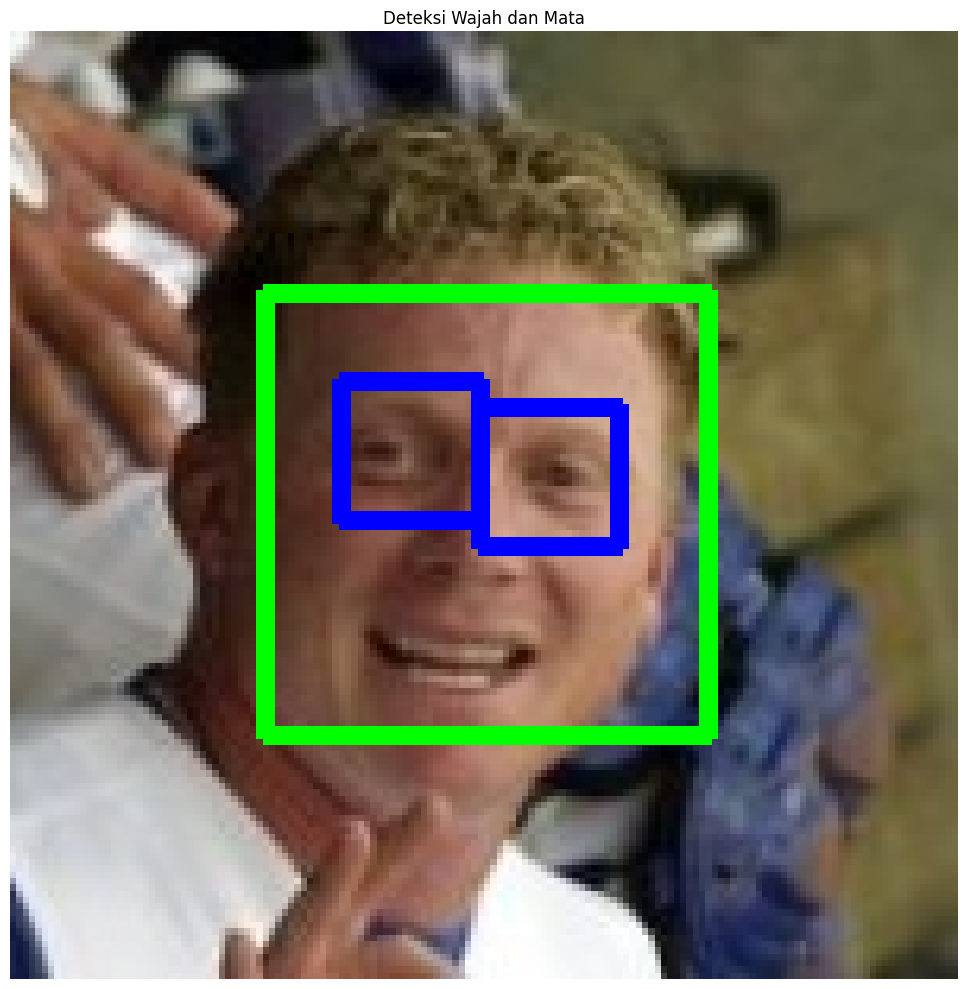

In [79]:
import os
import cv2
import matplotlib.pyplot as plt

def detect_faces_and_eyes(image_path):
    """
    Fungsi untuk mendeteksi wajah dan mata pada gambar

    Parameters:
    - image_path (str): Path lengkap ke file gambar

    Returns:
    - numpy.ndarray: Gambar dengan deteksi wajah dan mata
    """
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Gambar tidak ditemukan: {image_path}")

    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Gagal membaca gambar dari: {image_path}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Load model Haar Cascade untuk deteksi
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    # Deteksi wajah
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Deteksi mata dalam area wajah
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=3, minSize=(20, 20))

        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (255, 0, 0), 2)

    return img

def display_image(image):
    """Fungsi untuk menampilkan gambar dengan matplotlib"""
    plt.figure(figsize=(12, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Deteksi Wajah dan Mata')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    image_path = '/content/drive/MyDrive/dataset/Minggu12ML/images/Aaron_Guiel_0001.jpg'

    try:
        result_image = detect_faces_and_eyes(image_path)
        display_image(result_image)

    except Exception as e:
        print(f"Terjadi kesalahan: {e}")